## Stock Price Prediction using Linear Regression##

Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting. Different regression models differ based on – the kind of relationship between dependent and independent variables they are considering, and the number of independent variables getting used.

The simplest form of the regression equation with one dependent and one independent variable is defined by the formula y = c + b*x, where y = estimated dependent variable score, c = constant, b = regression coefficient, and x = score on the independent variable.

Naming the Variables.  There are many names for a regression’s dependent variable.  It may be called an outcome variable, criterion variable, endogenous variable, or regressand.  The independent variables can be called exogenous variables, predictor variables, or regressors.

Three major uses for regression analysis are (1) determining the strength of predictors, (2) forecasting an effect, and (3) trend forecasting.

Mathematically, we can represent a linear regression as:

**y= a0+a1x+ ε**

Y= Dependent Variable (Target Variable)
X= Independent Variable (predictor Variable)
a0= intercept of the line (Gives an additional degree of freedom)
a1 = Linear regression coefficient (scale factor to each input value).
ε = random error

**Import Necessary Libraries**

In [ ]:
#importing the libraries
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
print("Hello")

Hello


# **Initial Python Program**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Data Handling: Load CSV
df = pd.read_csv("/content/drive/MyDrive/ML Lab dataset/AAPL.csv")

# get to know list of features, data shape, stat. description.
print(df.shape)

print("First 5 lines:")
print(df.head(5))

print("describe: ")
print(df.describe())

print("info: ")
print(df.info())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(1258, 15)
First 5 lines:
   Unnamed: 0 symbol                       date    close     high     low  \
0           0   AAPL  2015-05-27 00:00:00+00:00  132.045  132.260  130.05   
1           1   AAPL  2015-05-28 00:00:00+00:00  131.780  131.950  131.10   
2           2   AAPL  2015-05-29 00:00:00+00:00  130.280  131.450  129.90   
3           3   AAPL  2015-06-01 00:00:00+00:00  130.535  131.390  130.05   
4           4   AAPL  2015-06-02 00:00:00+00:00  129.960  130.655  129.32   

     open    volume    adjClose     adjHigh      adjLow     adjOpen  \
0  130.34  45833246  121.682558  121.880685  119.844118  120.111360   
1  131.86  30733309  121.438354  121.595013  120.811718  121.512076   
2  131.23  50884452  120.056069  121.134251  119.705890  120.931516   
3  131.20  32112797  120.291057  121.078960  119.844118  120.903870   
4  129.86  33667627  119.76

In [ ]:
df

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.0500,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.1000,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.9000,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.0500,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.3200,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.960,316.500,310.3241,313.17,33843125,314.960000,316.500000,310.324100,313.170000,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.140,318.520,313.0100,315.03,25432385,313.140000,318.520000,313.010000,315.030000,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.230,319.520,316.2000,316.68,27876215,319.230000,319.520000,316.200000,316.680000,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.850,320.890,315.8700,318.66,25672211,316.850000,320.890000,315.870000,318.660000,25672211,0.0,1.0


**Data Preprocessing**

In [ ]:
df.isnull().sum()

Unnamed: 0     0
symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [ ]:
df = df.loc[(df['symbol'] == 'AAPL')]
df = df.drop(columns=['symbol'])
df = df[['date','open','close','low','volume','high']]

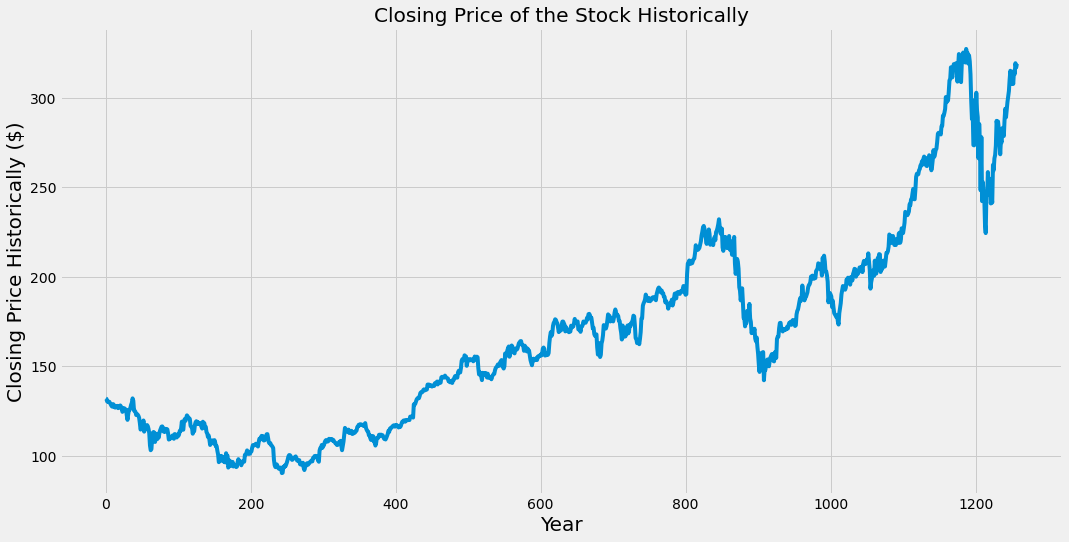

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Closing Price of the Stock Historically')
plt.plot(df['close'])
plt.xlabel('Year', fontsize=20)
plt.ylabel('Closing Price Historically ($)', fontsize=20)
plt.show()

##Regression Model##

In [ ]:
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt
import math

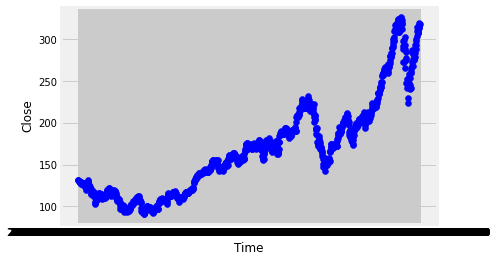

In [ ]:
plt.scatter(df.date, df.close,  color='blue')
plt.xlabel("Time")
plt.ylabel("Close")
plt.show()

In [ ]:
df.shape

(1258, 6)

In [ ]:
df['date'] = pd.to_datetime(df.date)

In [ ]:
df.head()

,date,open,close,low,volume,high
0,2015-05-27 00:00:00+00:00,130.34,132.045,130.05,45833246,132.260
1,2015-05-28 00:00:00+00:00,131.86,131.780,131.10,30733309,131.950
2,2015-05-29 00:00:00+00:00,131.23,130.280,129.90,50884452,131.450
3,2015-06-01 00:00:00+00:00,131.20,130.535,130.05,32112797,131.390
4,2015-06-02 00:00:00+00:00,129.86,129.960,129.32,33667627,130.655


In [ ]:
print(len(df))

1258


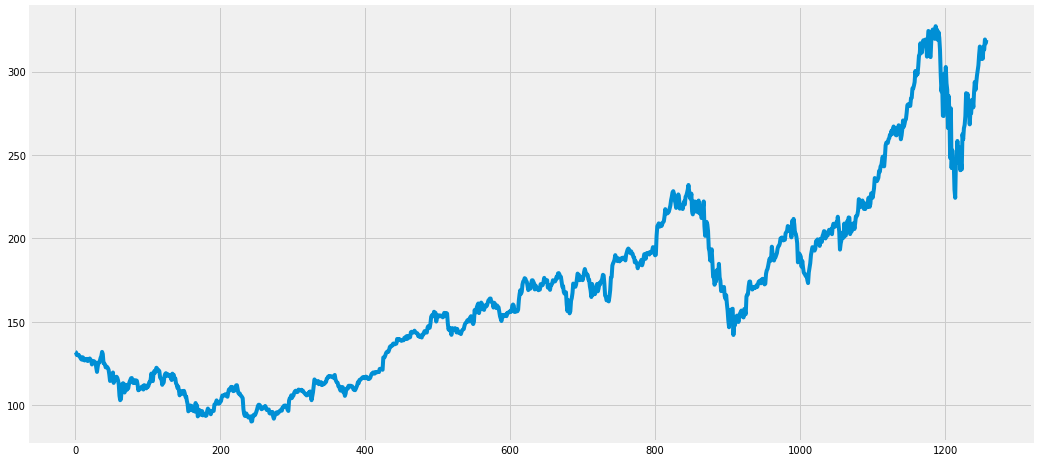

In [ ]:
df['close'].plot(figsize=(16,8))

In [ ]:
x1 = df[['open', 'high','low', 'volume']]
y1 = df['close']

In [ ]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, random_state = 0)

In [ ]:
x1_train.shape

(943, 4)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regression = LinearRegression()

In [ ]:
regression.fit(x1_train, y1_train)

LinearRegression()

In [ ]:
print(regression.coef_)

[-5.72199532e-01  6.87109453e-01  8.86463283e-01 -1.08492815e-09]


In [ ]:
print(regression.intercept_)

0.11094825488586935


In [ ]:
predicted=regression.predict(x1_test)

In [ ]:
print(x1_test)

         open     high       low    volume
5     130.660  130.940  129.9000  30983542
494   152.450  154.070  152.3100  25596687
52    116.530  119.990  116.5300  54951597
985   206.830  207.760  205.1200  18543206
186    96.310   96.900   95.9200  34280758
...       ...      ...       ...       ...
744   186.550  187.400  185.2200  23211241
1002  183.520  184.349  180.2839  38612290
922   154.110  154.480  151.7400  25441549
459   139.845  141.600  139.7600  25860165
911   149.560  151.820  148.5200  41025314

[315 rows x 4 columns]


In [ ]:
predicted.shape

(315,)

In [ ]:
dframe = pd.DataFrame(y1_test,predicted)
dfr=pd.DataFrame({'Actual_Price':y1_test, 'Predicted_Price':predicted})
print(dfr)

      Actual_Price  Predicted_Price
5           130.12       130.435435
494         153.95       153.731535
52          119.72       119.118748
985         205.28       206.328009
186          96.88        96.575683
...            ...              ...
744         187.36       186.296984
1002        183.09       181.541997
922         152.70       152.558283
459         141.42       141.250455
911         150.75       150.462761

[315 rows x 2 columns]


In [ ]:
dfr.head(10)

,Actual_Price,Predicted_Price
5,130.12,130.435435
494,153.95,153.731535
52,119.72,119.118748
985,205.28,206.328009
186,96.88,96.575683
18,127.61,127.767290
317,106.94,107.034249
511,154.45,155.399809
364,111.59,112.135240
571,163.35,163.113563


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
regression.score(x1_test, y1_test)

0.9993380579129287

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, predicted)))

Mean Absolute Error: 0.761370236045298
Mean Squared Error: 1.976697062918357
Root Mean Squared Error: 1.40595059049682


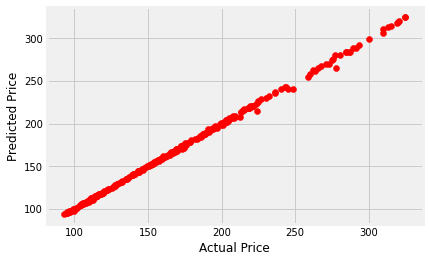

In [ ]:
plt.scatter(dfr.Actual_Price, dfr.Predicted_Price,  color='red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

plt.show()